# US Stock example using tpot

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

## Load dataset from kaggle

In [17]:
# Load the dataset (make sure to replace the path with where you've saved the file)
df = pd.read_csv('data/US_Stock_Data.csv')

# Use 'mixed' format if the date format is inconsistent
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Set 'Date' as the index for time-series analysis
df.set_index('Date', inplace=True)

# Display the first few rows to ensure the date is correctly parsed
df.head()

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-02,0,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
2024-02-01,1,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2024-01-31,2,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
2024-01-30,3,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
2024-01-29,4,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


In [19]:
# Check if 'Date' is set as the index
print(df.index)

# Check the first few rows to confirm the index is the Date
df.head()

DatetimeIndex(['2024-02-02', '2024-02-01', '2024-01-31', '2024-01-30',
               '2024-01-29', '2024-01-26', '2024-01-25', '2024-01-24',
               '2024-01-23', '2024-01-22',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=1013, freq=None)


,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-02,0,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,901.6,...,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN
2024-02-01,1,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,922.3,...,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0
2024-01-31,2,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,932.6,...,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0
2024-01-30,3,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,931.7,...,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0
2024-01-29,4,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,938.3,...,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0


## CLean Data 

In [30]:
# Replace commas in the numeric columns and convert them to floats
df_cleaned = df.replace({',': ''}, regex=True)

# Convert all columns to numeric where possible
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values (e.g., NaNs)
print(df_cleaned.isnull().sum())

# Fill missing values (if any) using forward-fill or another appropriate method
df_cleaned.fillna(method='ffill', inplace=True)

# Verify the data types after conversion
print(df_cleaned.dtypes)

# set the cleaned data to the original dataframe
df = df_cleaned

Unnamed: 0            0
Natural_Gas_Price     0
Natural_Gas_Vol.      1
Crude_oil_Price       0
Crude_oil_Vol.        1
Copper_Price          0
Copper_Vol.          26
Bitcoin_Price         0
Bitcoin_Vol.          0
Platinum_Price        0
Platinum_Vol.        23
Ethereum_Price        0
Ethereum_Vol.         0
S&P_500_Price         0
Nasdaq_100_Price      0
Nasdaq_100_Vol.       0
Apple_Price           0
Apple_Vol.            0
Tesla_Price           0
Tesla_Vol.            0
Microsoft_Price       0
Microsoft_Vol.        0
Silver_Price          0
Silver_Vol.           1
Google_Price          0
Google_Vol.           0
Nvidia_Price          0
Nvidia_Vol.           0
Berkshire_Price       0
Berkshire_Vol.        0
Netflix_Price         0
Netflix_Vol.          0
Amazon_Price          0
Amazon_Vol.           0
Meta_Price            0
Meta_Vol.             0
Gold_Price            0
Gold_Vol.             1
dtype: int64
Unnamed: 0             int64
Natural_Gas_Price    float64
Natural_Gas_Vol. 

/var/folders/s9/1stspztx1671y14rs3j9m8gm0000gn/T/ipykernel_83697/3565020691.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)


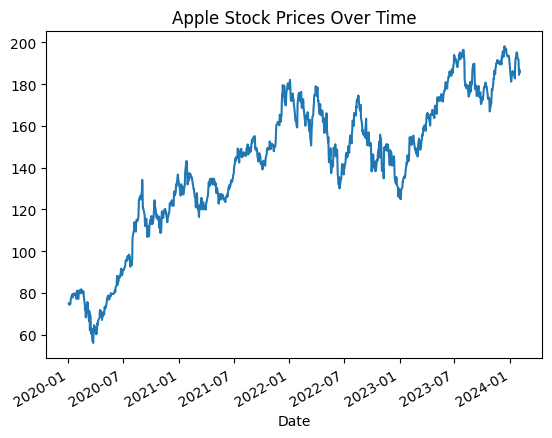

In [31]:
# Plot to visualize the stock market trends over time (e.g., Apple prices)
df['Apple_Price'].plot(title='Apple Stock Prices Over Time')
plt.show()

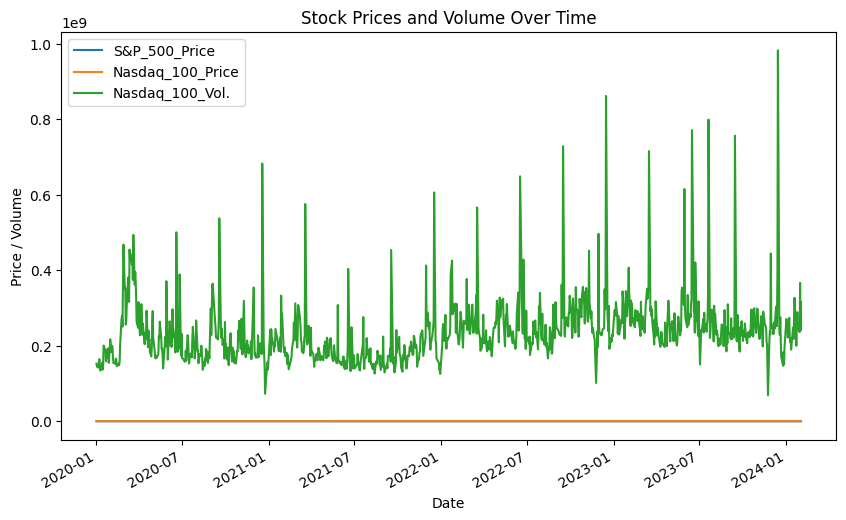

In [32]:
import matplotlib.pyplot as plt

# Plot S&P 500 Price, Nasdaq 100 Price, and Nasdaq 100 Volume on the same graph
df[['S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.']].plot(figsize=(10, 6), title='Stock Prices and Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Price / Volume')
plt.legend(loc='upper left')
plt.show()

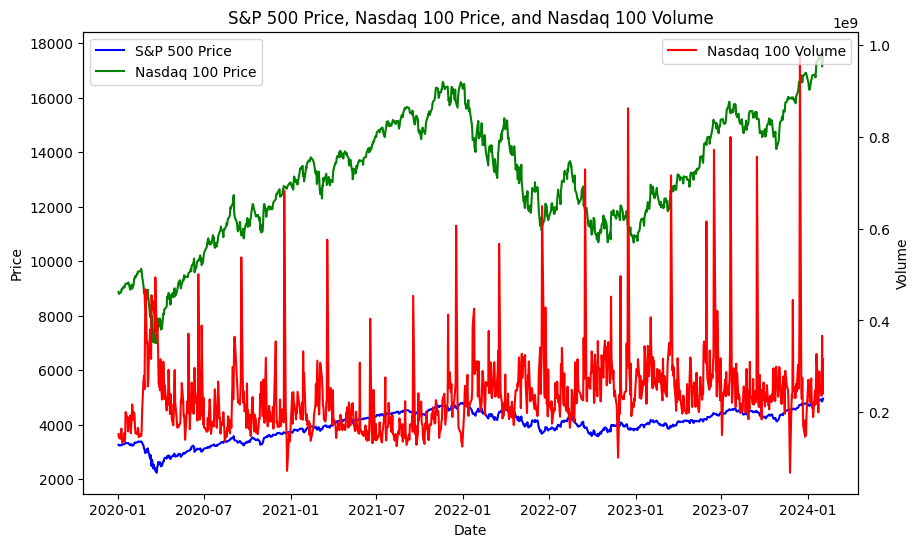

In [33]:
# Create a dual-axis plot for prices and volume
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the prices on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.plot(df.index, df['S&P_500_Price'], label='S&P 500 Price', color='blue')
ax1.plot(df.index, df['Nasdaq_100_Price'], label='Nasdaq 100 Price', color='green')
ax1.tick_params(axis='y')

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume')
ax2.plot(df.index, df['Nasdaq_100_Vol.'], label='Nasdaq 100 Volume', color='red')
ax2.tick_params(axis='y')

# Adding legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('S&P 500 Price, Nasdaq 100 Price, and Nasdaq 100 Volume')
plt.show()

## Heatmap

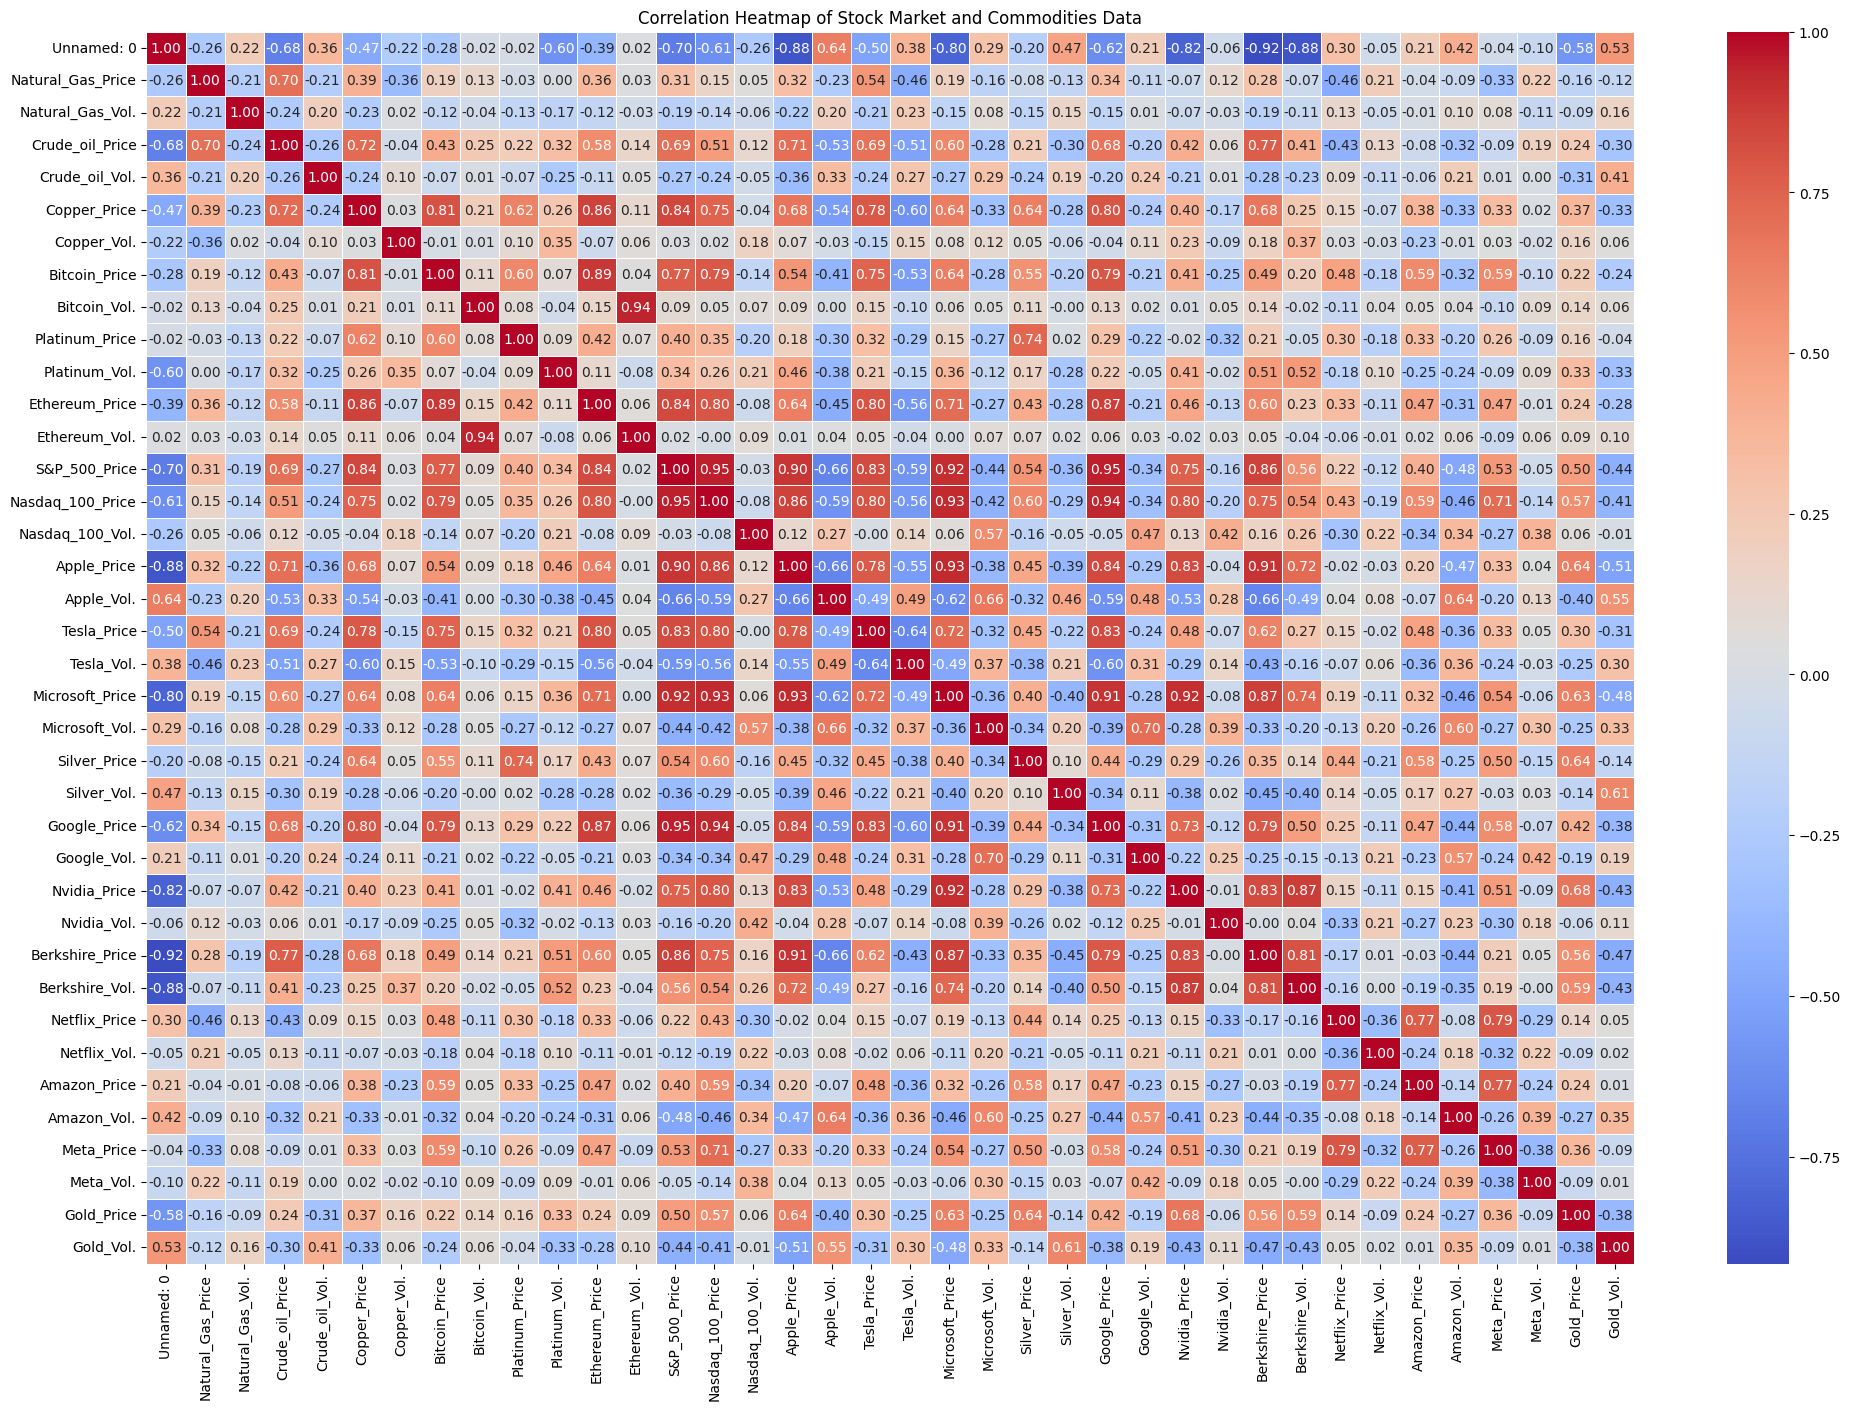

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the dataset
corr_matrix = df.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(24, 16))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Market and Commodities Data')
plt.show()

## PCA

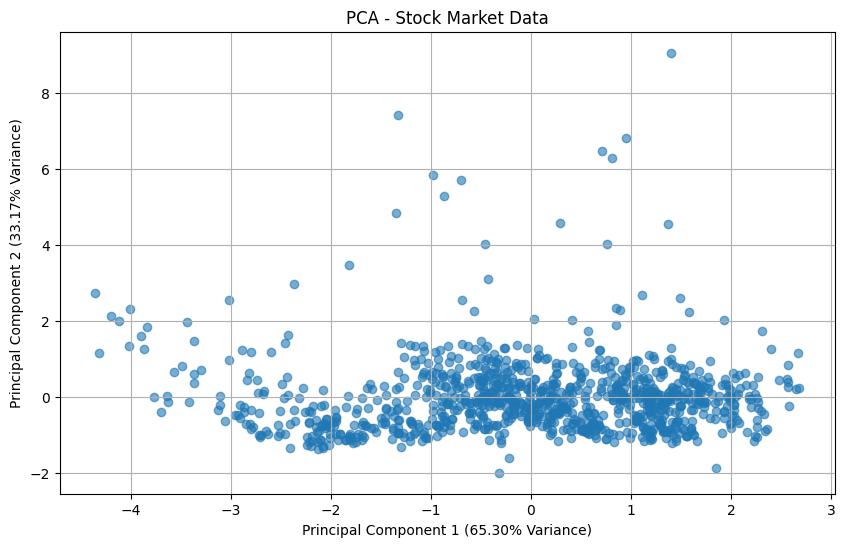

Explained variance by each component: [0.65301774 0.33166529]


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA (we'll exclude any non-numeric columns if necessary)
# Ensure that only the price and volume columns are selected
columns_for_pca = ['S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.']  # Add other columns as needed

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_pca])

# Apply PCA
pca = PCA(n_components=2)  # We can choose 2 components for 2D visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the date index back to the PCA result
pca_df.index = df.index

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title('PCA - Stock Market Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.grid(True)
plt.show()

# Optional: Display the explained variance ratio
print(f'Explained variance by each component: {pca.explained_variance_ratio_}')

## PCA analysis

In [41]:

# Get PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=columns_for_pca)


# Display the loadings for PC1 and PC2
print("PCA Loadings for PC1 and PC2:")
print(loadings)

# Identify the top 3 most correlated features for each principal component
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(3)

print("\nTop 3 most correlated features with PC1:")
print(top_features_pc1)

print("\nTop 3 most correlated features with PC2:")
print(top_features_pc2)

PCA Loadings for PC1 and PC2:
                       PC1       PC2
S&P_500_Price     0.704007  0.078613
Nasdaq_100_Price  0.705801  0.032910
Nasdaq_100_Vol.  -0.078859  0.996362

Top 3 most correlated features with PC1:
Nasdaq_100_Price    0.705801
S&P_500_Price       0.704007
Nasdaq_100_Vol.     0.078859
Name: PC1, dtype: float64

Top 3 most correlated features with PC2:
Nasdaq_100_Vol.     0.996362
S&P_500_Price       0.078613
Nasdaq_100_Price    0.032910
Name: PC2, dtype: float64


## Use tpot to find best fit 

In [55]:
# List all columns except 'S&P_500_Price'
features = df_cleaned.columns.drop('S&P_500_Price')

# Prepare the features (X) and target (y)
X = df_cleaned[features]  # All features except 'S&P_500_Price'
y = df_cleaned['S&P_500_Price']  # Target variable

In [56]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (810, 2), y_train shape: (810,)
X_test shape: (203, 2), y_test shape: (203,)


## Setup TPOT

In [47]:
from tpot import TPOTRegressor

# Set up TPOTRegressor with 5 generations and a population size of 50
tpot = TPOTRegressor(
    generations=5,  # Number of iterations (generations)
    population_size=50,  # Number of models to evaluate in each iteration
    verbosity=2,  # Print progress details
    random_state=42,  # Reproducibility
    n_jobs=-1  # Use all available CPU cores
)

# Train TPOT on the training data
tpot.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -19908.33030276443

Generation 2 - Current best internal CV score: -19908.33030276443

Generation 3 - Current best internal CV score: -18468.064721319508

Generation 4 - Current best internal CV score: -18468.064721319508

Generation 5 - Current best internal CV score: -18468.064721319508

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=1, max_features=0.4, min_samples_leaf=6, min_samples_split=5, n_estimators=100, subsample=0.4)


TPOTRegressor(generations=5, n_jobs=-1, population_size=50, random_state=42,
              verbosity=2)

In [48]:
import joblib

# Assuming 'tpot.fitted_pipeline_' holds the best model, which is your GradientBoostingRegressor
best_model = tpot.fitted_pipeline_

# Save the model to a file
joblib.dump(best_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [49]:
# Load the model from the file
loaded_model = joblib.load('gradient_boosting_model.pkl')

/Users/rustic/Documents/notebooks/venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


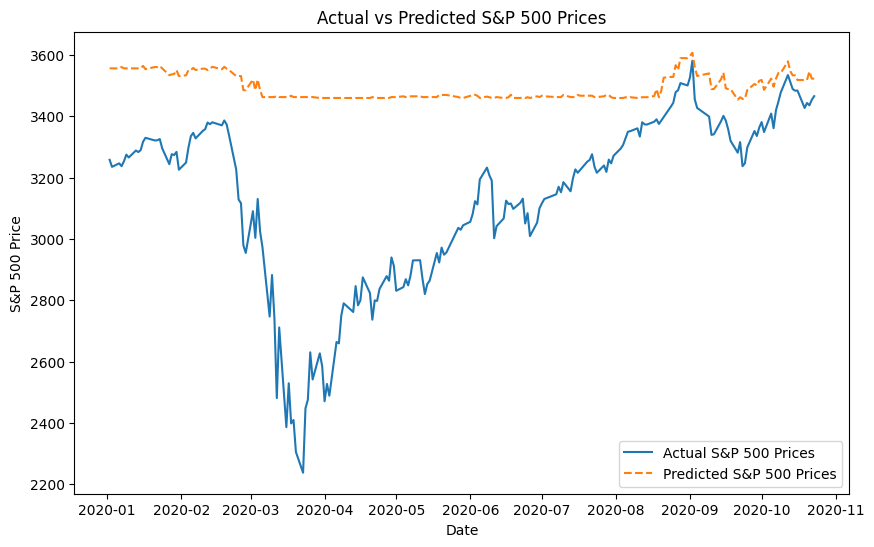

In [50]:
# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual S&P 500 Prices')
plt.plot(y_test.index, y_pred, label='Predicted S&P 500 Prices', linestyle='--')
plt.title('Actual vs Predicted S&P 500 Prices')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.show()

## Try training longer

In [51]:
from tpot import TPOTRegressor

# Set up TPOTRegressor with 5 generations and a population size of 50
tpot = TPOTRegressor(
    generations=10,  # Number of iterations (generations)
    population_size=100,  # Number of models to evaluate in each iteration
    verbosity=2,  # Print progress details
    random_state=42,  # Reproducibility
    n_jobs=-1  # Use all available CPU cores
)

# Train TPOT on the training data
tpot.fit(X_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -19908.33030276443

Generation 2 - Current best internal CV score: -19862.90262680944

Generation 3 - Current best internal CV score: -15550.894605512909

Generation 4 - Current best internal CV score: -13832.107032753373

Generation 5 - Current best internal CV score: -13832.107032753373

Generation 6 - Current best internal CV score: -13832.107032753373

Generation 7 - Current best internal CV score: -13832.107032753373

Generation 8 - Current best internal CV score: -13832.107032753373

Generation 9 - Current best internal CV score: -11805.45736531587

Generation 10 - Current best internal CV score: -11805.45736531587

Best pipeline: RandomForestRegressor(RidgeCV(StandardScaler(MaxAbsScaler(input_matrix))), bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=16, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=10, n_jobs=-1, random_state=42, verbosity=2)

In [52]:
import joblib

# Assuming 'tpot.fitted_pipeline_' holds the best model, which is your GradientBoostingRegressor
best_model = tpot.fitted_pipeline_

# Save the model to a file
joblib.dump(best_model, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

In [53]:
# Load the model from the file
loaded_model = joblib.load('random_forest_regressor.pkl')

/Users/rustic/Documents/notebooks/venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MaxAbsScaler was fitted without feature names
  warnings.warn(


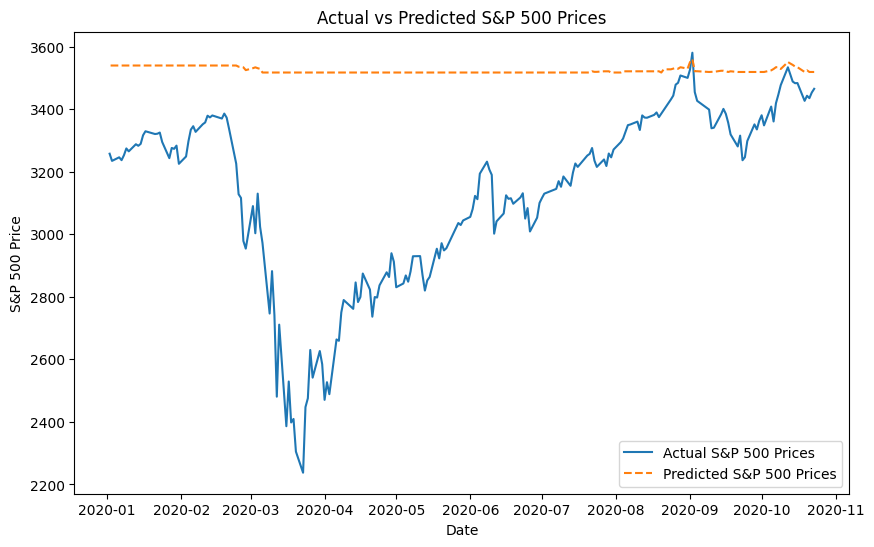

In [54]:
# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual S&P 500 Prices')
plt.plot(y_test.index, y_pred, label='Predicted S&P 500 Prices', linestyle='--')
plt.title('Actual vs Predicted S&P 500 Prices')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.show()